# Baseline forecasting for Air Passenger data

- naive
- seasonal naive
- random walk
- random walk with drift

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(xts)
library(fpp2)
library(forecast)
library(DMwR)
library(Metrics)
library(hydroGOF)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: forecast
Loading required package: fma
Loading required package: expsmooth
Loading required package: lattice
Loading required package: grid

Attaching package: ‘DMwR’

The following object is masked from ‘package:fma’:

    sales


Attaching package: ‘Metrics’

The following object is masked from ‘package:forecast’:

    accuracy


Attaching package: ‘hydroGOF’

The following objects are masked from ‘package:Metrics’:

    mae, ms

In [2]:
options(repr.plot.width=8, repr.plot.height=4)

## 1. Data import

In [3]:
data <- read_csv('../data/air-passenger/AirPassengers.csv')
head(data)

Parsed with column specification:
cols(
  Month = col_character(),
  `airline passenger monthly totals` = col_double()
)


Month,airline passenger monthly totals
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135


In [4]:
# change the name of column
names(data) <- c('Month', 'passengers')
head(data)
tail(data)

nrow(data)

Month,passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135


Month,passengers
1960-07,622
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


[1] 144

## 2. Convert to ts object

In [5]:
passenger <-
    ts(
        data[-1],
        frequency = 12,
        start = c(1949, 1),
        end = c(1960, 12)
    )

head(passenger)
tail(passenger)

     Jan Feb Mar Apr May Jun
1949 112 118 132 129 121 135

     Jul Aug Sep Oct Nov Dec
1960 622 606 508 461 390 432

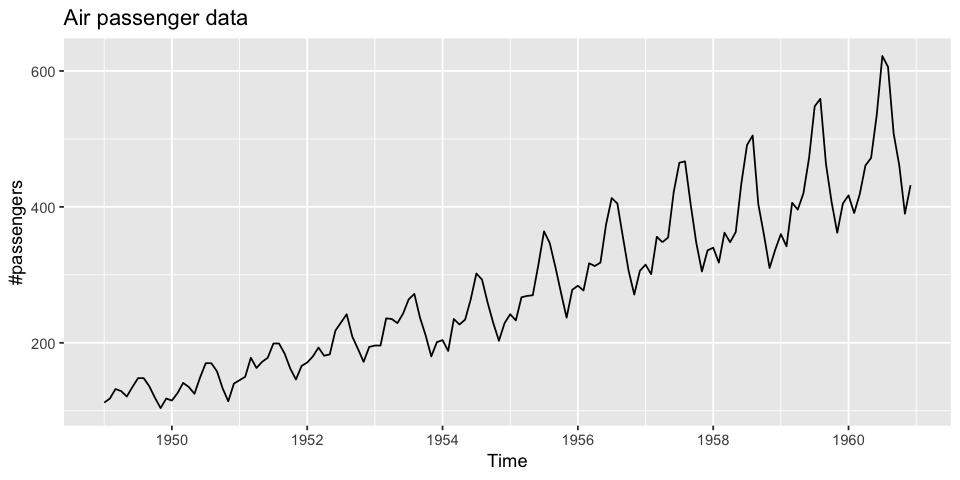

In [6]:
autoplot(passenger) + ylab('#passengers') + ggtitle('Air passenger data')

## 3. Train test split

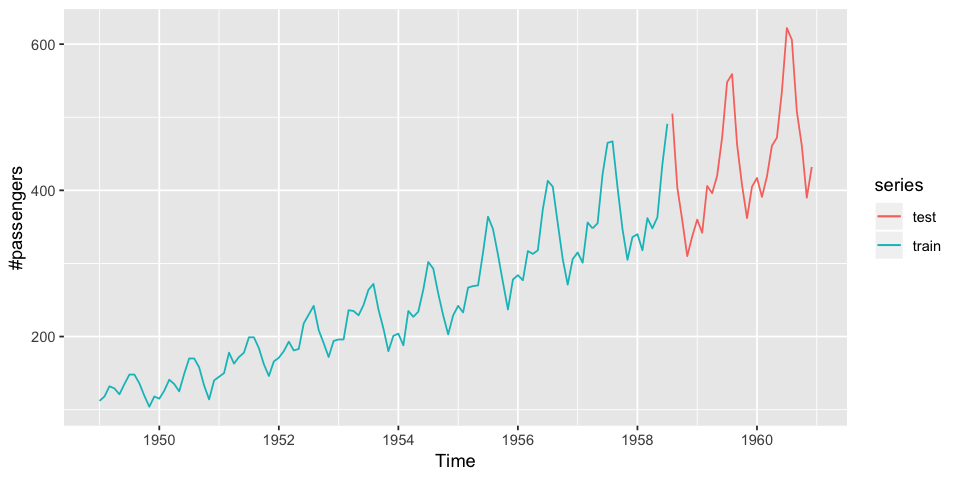

In [7]:
## training and test split
train <- head(passenger, 115)
test <- tail(passenger, 29)

autoplot(train, series = 'train') + autolayer(test, series = 'test') +
    ylab('#passengers')

## 4. Naive model or Random walk without drift

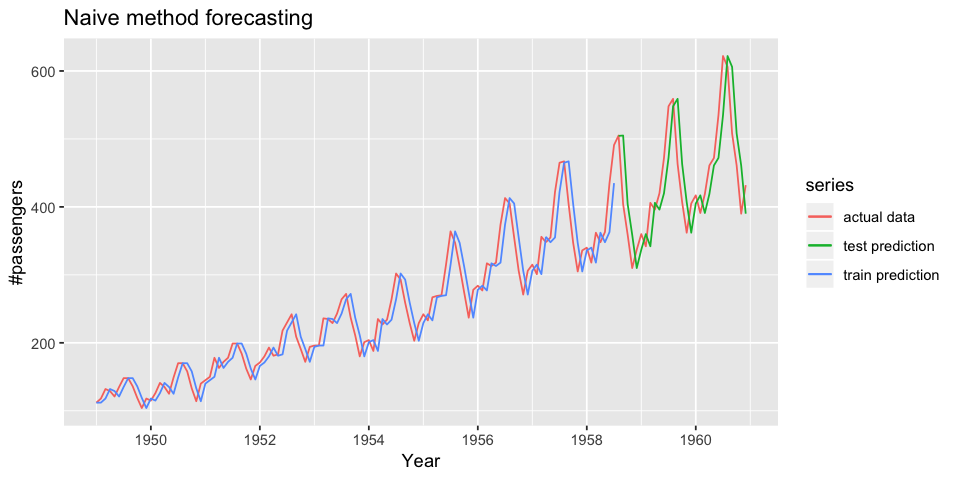

In [8]:
naive_model <- Arima(train, order = c(0, 1, 0))
naive_frcst <- Arima(test, model = naive_model)

autoplot(passenger, series = 'actual data') +
    autolayer(fitted(naive_model), series = 'train prediction') +
    autolayer(fitted(naive_frcst), series = 'test prediction') +
    xlab('Year') +
    ylab('#passengers') +
    ggtitle('Naive method forecasting')

Series: train 
ARIMA(0,1,0) 

sigma^2 estimated as 724.6:  log likelihood=-537.14
AIC=1076.27   AICc=1076.31   BIC=1079.01

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE      ACF1
Training set 3.296626 26.80023 20.87923 0.7533549 8.62815 0.7097562 0.2728851

	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 182.03, df = 23, p-value < 2.2e-16

Model df: 0.   Total lags used: 23



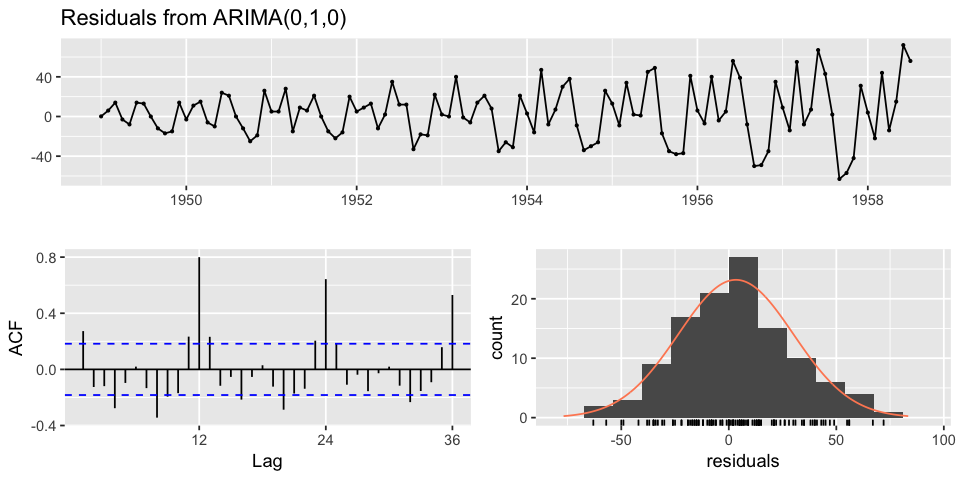

In [9]:
summary(naive_model)
checkresiduals(naive_model)

In [10]:
train_pred <- fitted(naive_model)
test_pred <- fitted(naive_frcst)

train_rmse <- sqrt(mse(train, train_pred))
train_mae <- mae(train, train_pred)
train_nrmse <- train_rmse/sd(train)

test_rmse <- sqrt(mse(test, test_pred))
test_mae <- mae(test, test_pred)
test_nrmse <- test_rmse/sd(test)

print(paste0('Training RMSE :', round(train_rmse, 3)))
print(paste0('Training NRMSE :', round(train_nrmse, 3)))
print(paste0('Training MAE :', round(train_mae, 3)))

print(paste0('Test RMSE :', round(test_rmse, 3)))
print(paste0('Test NRMSE :', round(test_nrmse, 3)))
print(paste0('Test MAE :', round(test_mae, 3)))

[1] "Training RMSE :26.8"
[1] "Training NRMSE :0.293"
[1] "Training MAE :20.879"
[1] "Test RMSE :52.427"
[1] "Test NRMSE :0.659"
[1] "Test MAE :44.259"


## 5. Seasonal naive

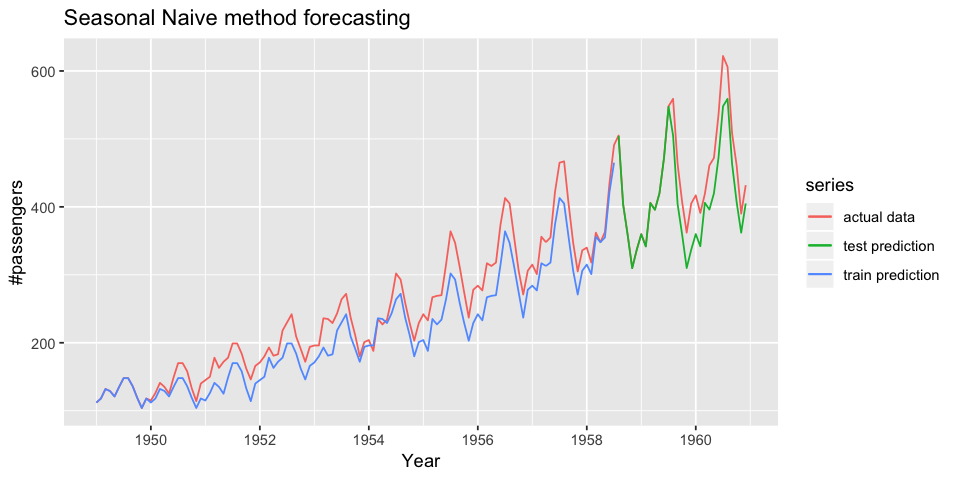

In [11]:
snaive_model <- Arima(train, order = c(0, 0, 0), seasonal = list(order = c(0, 1, 0)))
snaive_frcst <- Arima(test, model = snaive_model)

autoplot(passenger, series = 'actual data') +
    autolayer(fitted(snaive_model), series = 'train prediction') +
    autolayer(fitted(snaive_frcst), series = 'test prediction') +
    xlab('Year') +
    ylab('#passengers') +
    ggtitle('Seasonal Naive method forecasting')

Series: train 
ARIMA(0,0,0)(0,1,0)[12] 

sigma^2 estimated as 1092:  log likelihood=-506.45
AIC=1014.89   AICc=1014.93   BIC=1017.53

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE      ACF1
Training set 26.06539 31.27775 26.36104 10.47215 10.61485 0.8961015 0.8465221

	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(0,1,0)[12]
Q* = 344.43, df = 23, p-value < 2.2e-16

Model df: 0.   Total lags used: 23



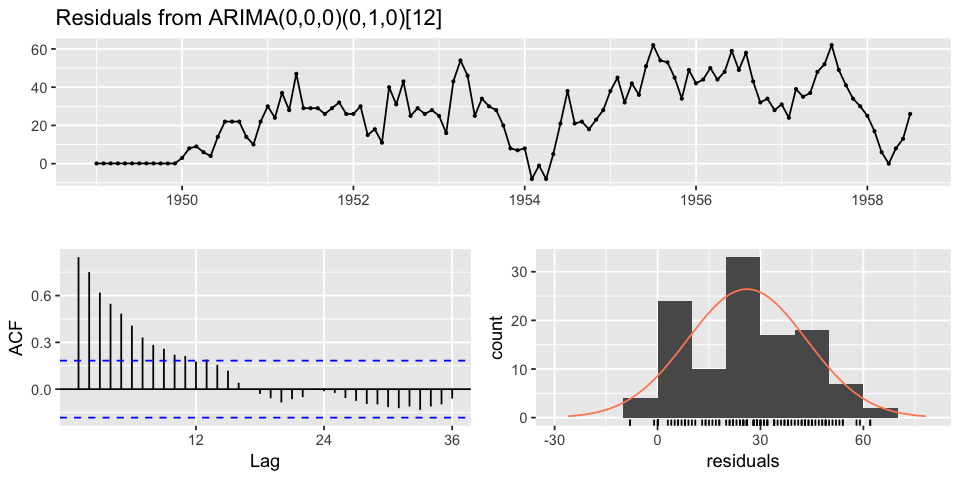

In [12]:
summary(snaive_model)
checkresiduals(snaive_model)

In [13]:
train_pred <- fitted(snaive_model)
test_pred <- fitted(snaive_frcst)

train_rmse <- sqrt(mse(train, train_pred))
train_mae <- mae(train, train_pred)
train_nrmse <- train_rmse/sd(train)

test_rmse <- sqrt(mse(test, test_pred))
test_mae <- mae(test, test_pred)
test_nrmse <- test_rmse/sd(test)

print(paste0('Training RMSE :', round(train_rmse, 3)))
print(paste0('Training NRMSE :', round(train_nrmse, 3)))
print(paste0('Training MAE :', round(train_mae, 3)))

print(paste0('Test RMSE :', round(test_rmse, 3)))
print(paste0('Test NRMSE :', round(test_nrmse, 3)))
print(paste0('Test MAE :', round(test_mae, 3)))

[1] "Training RMSE :31.278"
[1] "Training NRMSE :0.342"
[1] "Training MAE :26.361"
[1] "Test RMSE :40.209"
[1] "Test NRMSE :0.506"
[1] "Test MAE :29.65"


## 6. Random walk with Drift

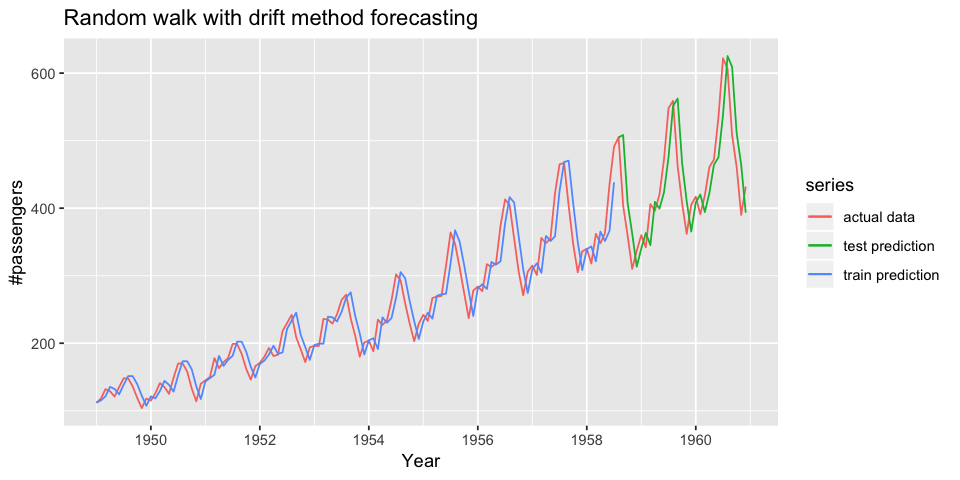

In [14]:
rwf_model <- Arima(train, order = c(0, 1, 0), include.drift = TRUE)
rwf_frcst <- Arima(test, model = rwf_model)

autoplot(passenger, series = 'actual data') +
    autolayer(fitted(rwf_model), series = 'train prediction') +
    autolayer(fitted(rwf_frcst), series = 'test prediction') +
    xlab('Year') +
    ylab('#passengers') +
    ggtitle('Random walk with drift method forecasting')

Series: train 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      3.3246
s.e.  2.5018

sigma^2 estimated as 719.8:  log likelihood=-536.26
AIC=1076.52   AICc=1076.63   BIC=1081.99

Training set error measures:
                       ME     RMSE      MAE        MPE    MAPE      MASE
Training set 0.0009450033 26.59503 20.72833 -0.8216884 8.63742 0.7046264
                  ACF1
Training set 0.2730474

	Ljung-Box test

data:  Residuals from ARIMA(0,1,0) with drift
Q* = 182.41, df = 22, p-value < 2.2e-16

Model df: 1.   Total lags used: 23



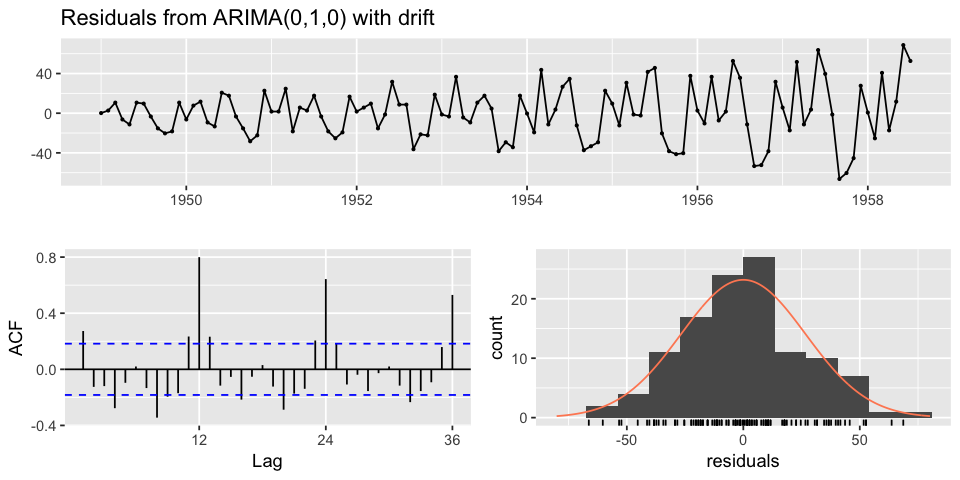

In [15]:
summary(rwf_model)
checkresiduals(rwf_model)

In [16]:
train_pred <- fitted(rwf_model)
test_pred <- fitted(rwf_frcst)

train_rmse <- sqrt(mse(train, train_pred))
train_mae <- mae(train, train_pred)
train_nrmse <- train_rmse/sd(train)

test_rmse <- sqrt(mse(test, test_pred))
test_mae <- mae(test, test_pred)
test_nrmse <- test_rmse/sd(test)

print(paste0('Training RMSE :', round(train_rmse, 3)))
print(paste0('Training NRMSE :', round(train_nrmse, 3)))
print(paste0('Training MAE :', round(train_mae, 3)))

print(paste0('Test RMSE :', round(test_rmse, 3)))
print(paste0('Test NRMSE :', round(test_nrmse, 3)))
print(paste0('Test MAE :', round(test_mae, 3)))

[1] "Training RMSE :26.595"
[1] "Training NRMSE :0.291"
[1] "Training MAE :20.728"
[1] "Test RMSE :52.688"
[1] "Test NRMSE :0.663"
[1] "Test MAE :44.016"


## Combined plots

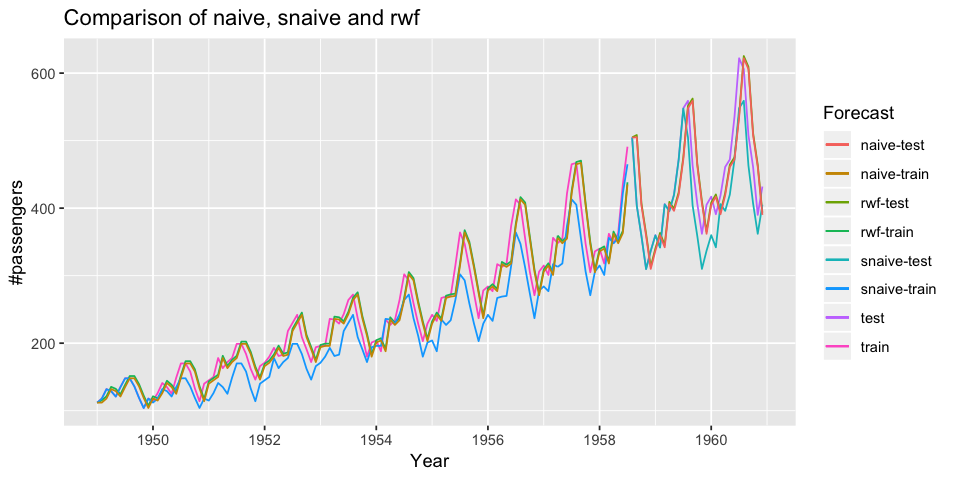

In [17]:
autoplot(train, series = 'train') +
    autolayer(test, series = 'test') +
    autolayer(fitted(rwf_model), series = 'rwf-train') +
    autolayer(fitted(rwf_frcst), series = 'rwf-test') +
    autolayer(fitted(snaive_model), series = 'snaive-train') +
    autolayer(fitted(snaive_frcst), series = 'snaive-test') +
    autolayer(fitted(naive_model), series = 'naive-train') +
    autolayer(fitted(naive_frcst), series = 'naive-test') +
    ggtitle('Comparison of naive, snaive and rwf') +
    xlab('Year') +
    ylab('#passengers') +
    guides(colour=guide_legend(title="Forecast"))